In [30]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
import glob
from IPython.display import Image, display

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (Quadro M2000M, 4042MiB)
Setup complete ✅ (8 CPUs, 31.2 GB RAM, 383.9/418.9 GB disk)


In [31]:
from ultralytics import YOLO
import os
HOME = os.getcwd()
import dotenv

dotenv.load_dotenv()
api_key = os.getenv("api_key")

In [32]:
from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("berkay-kilic-dpfzs").project("plate-5gbkk")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [33]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=1 imgsz=800 plots=True device=cpu

/home/apprenant/Bureau/Immat
100%|██████████████████████████████████████| 21.5M/21.5M [00:05<00:00, 3.99MB/s]
New https://pypi.org/project/ultralytics/8.2.3 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-6820HQ 2.70GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/apprenant/Bureau/Immat/plate-1/data.yaml, epochs=1, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, 

In [34]:
!ls {HOME}/runs/detect/train/

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  weights
labels.jpg			 train_batch1.jpg
P_curve.png			 train_batch2.jpg


/home/apprenant/Bureau/Immat


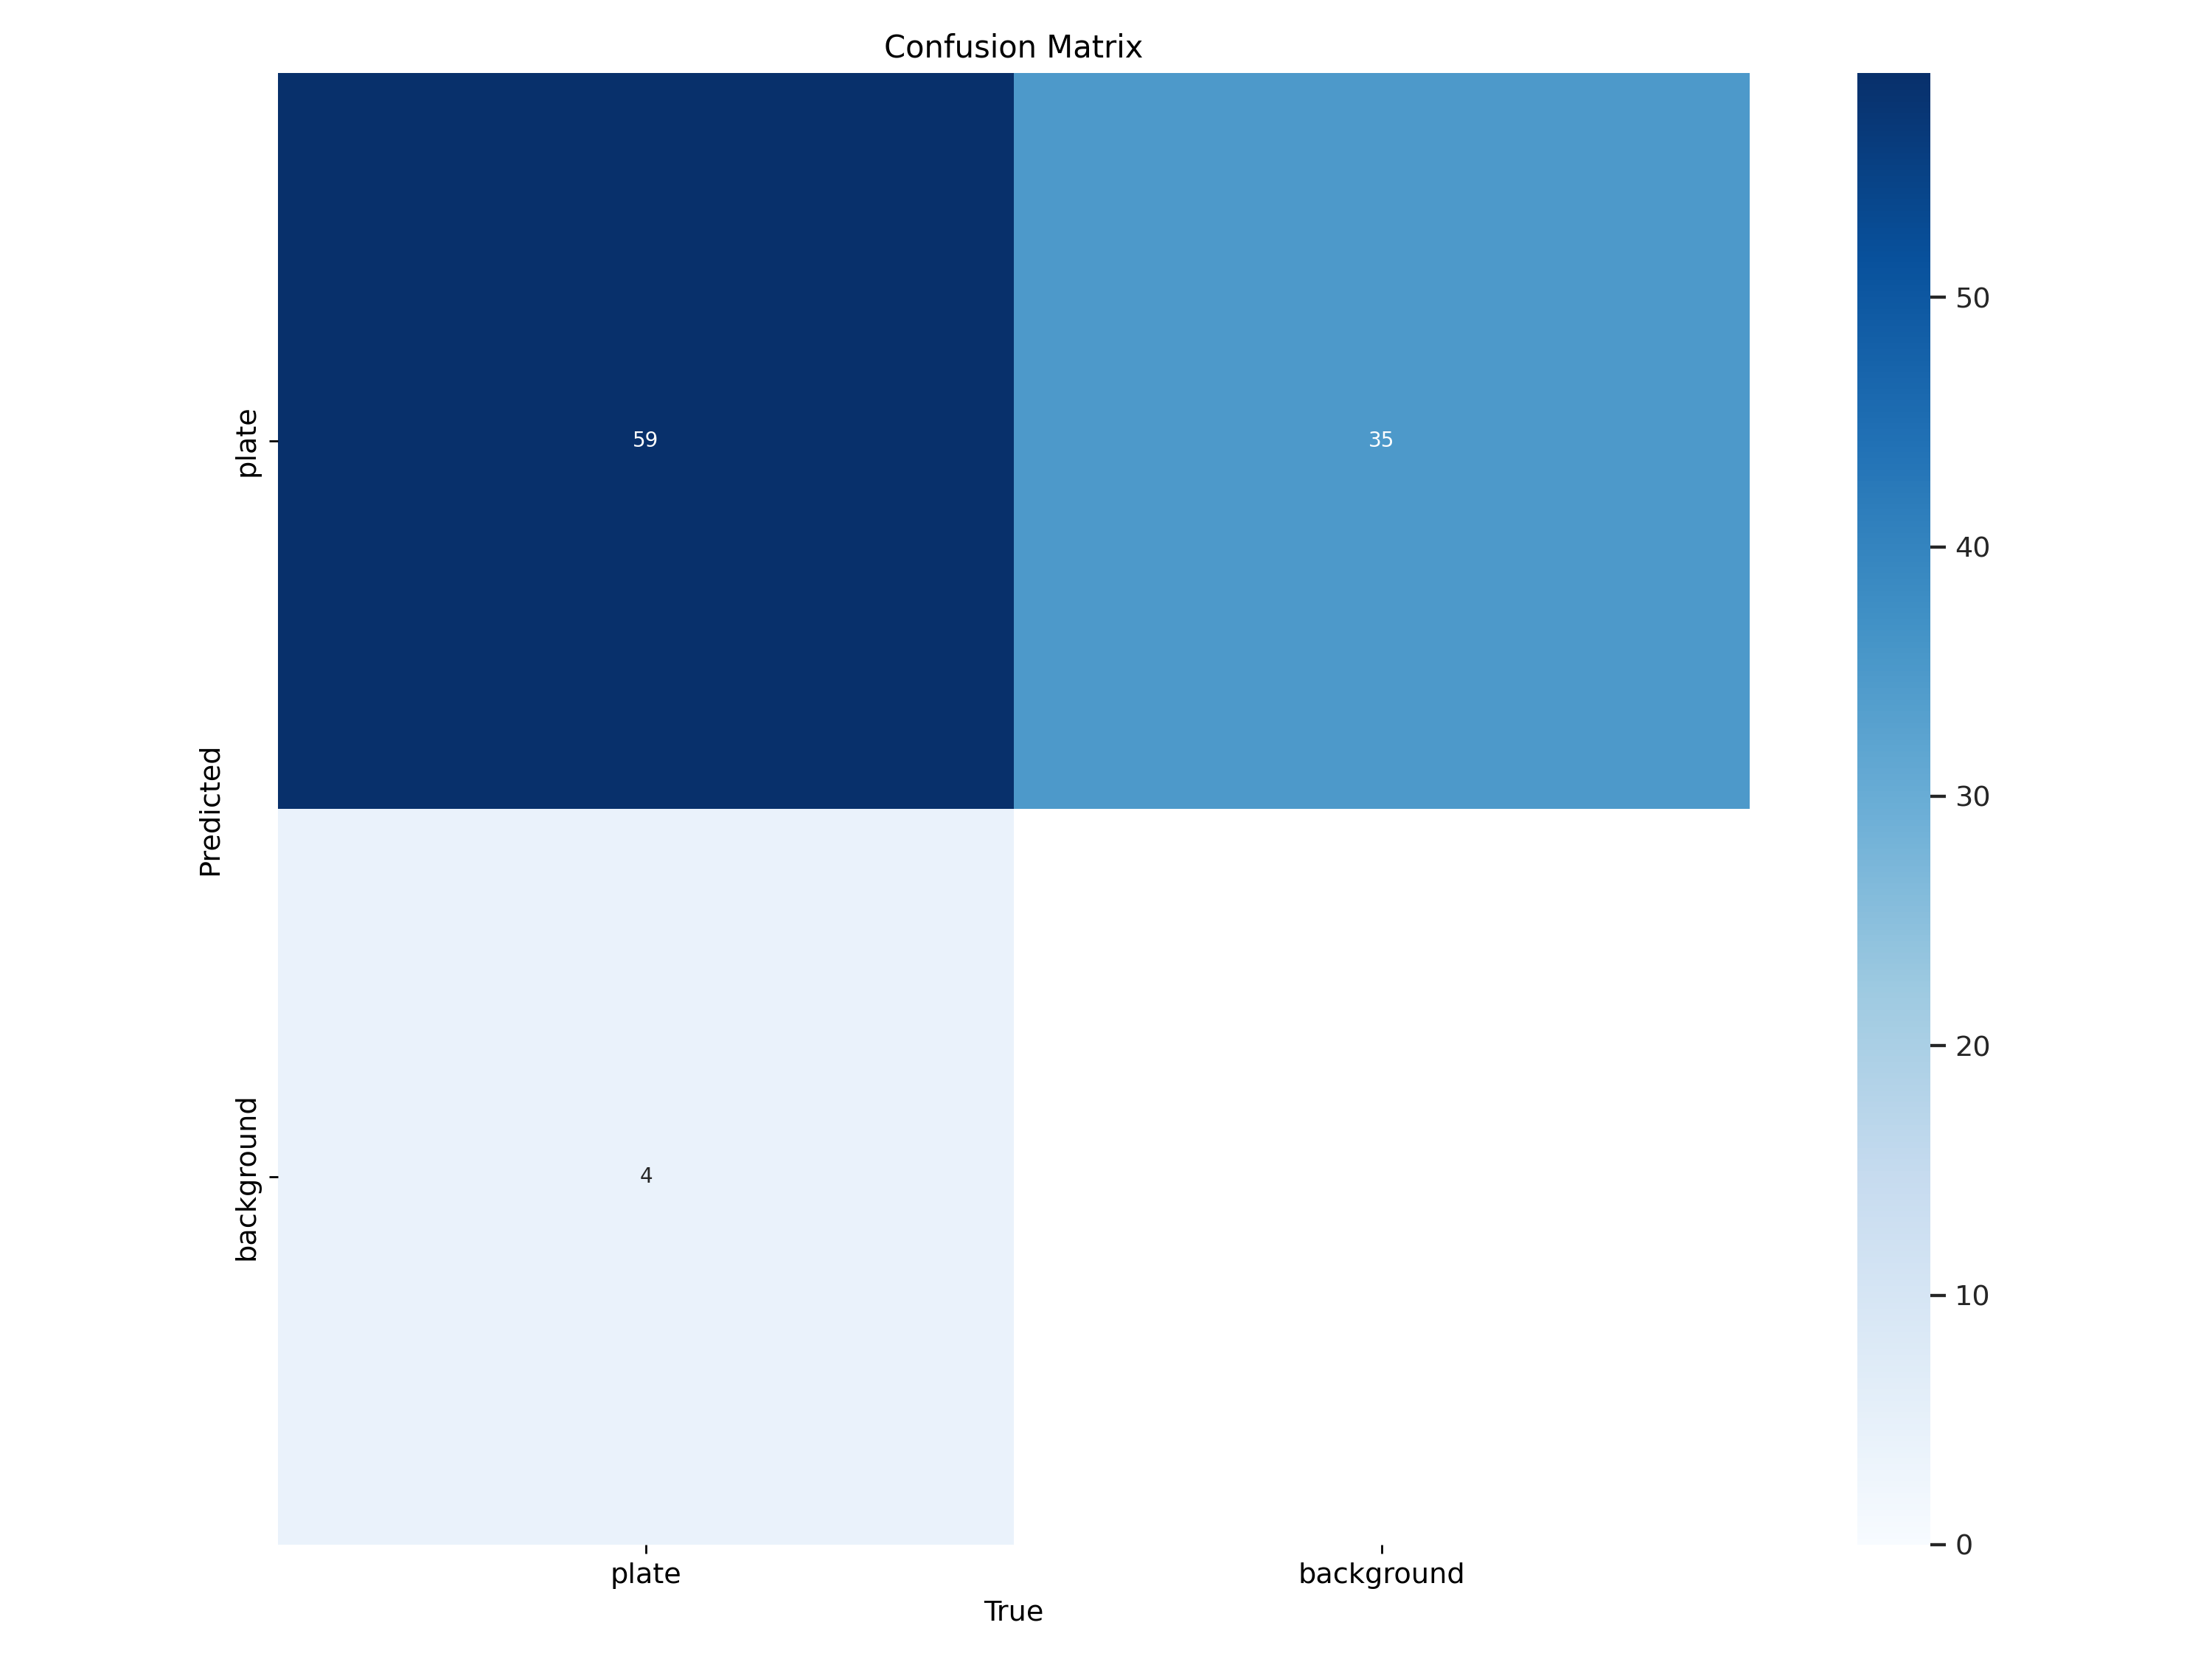

In [35]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/apprenant/Bureau/Immat


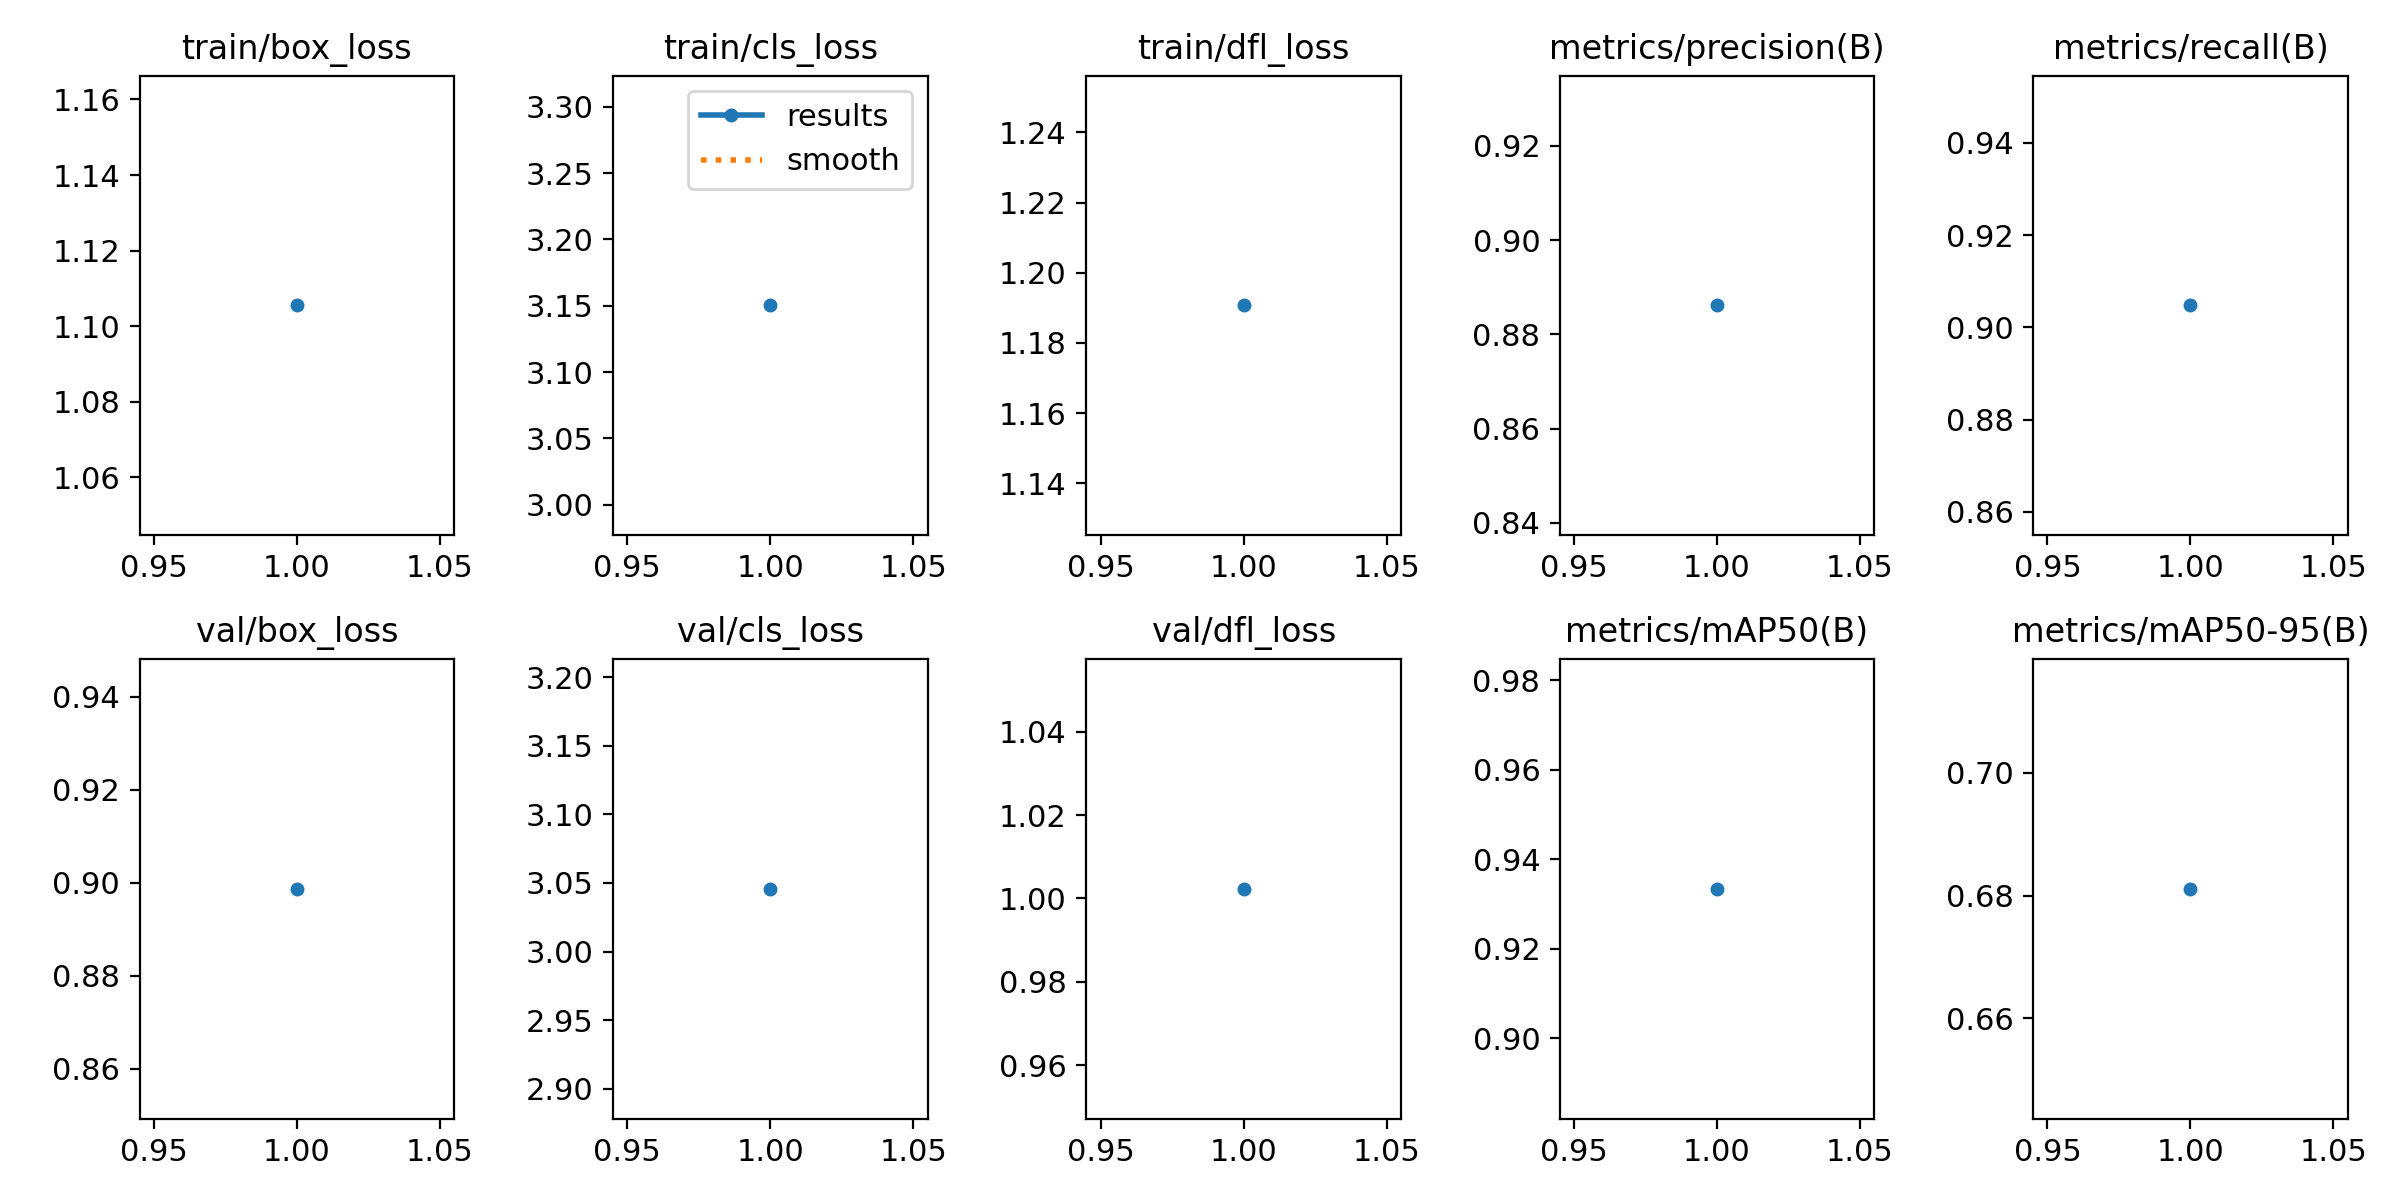

In [36]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/home/apprenant/Bureau/Immat


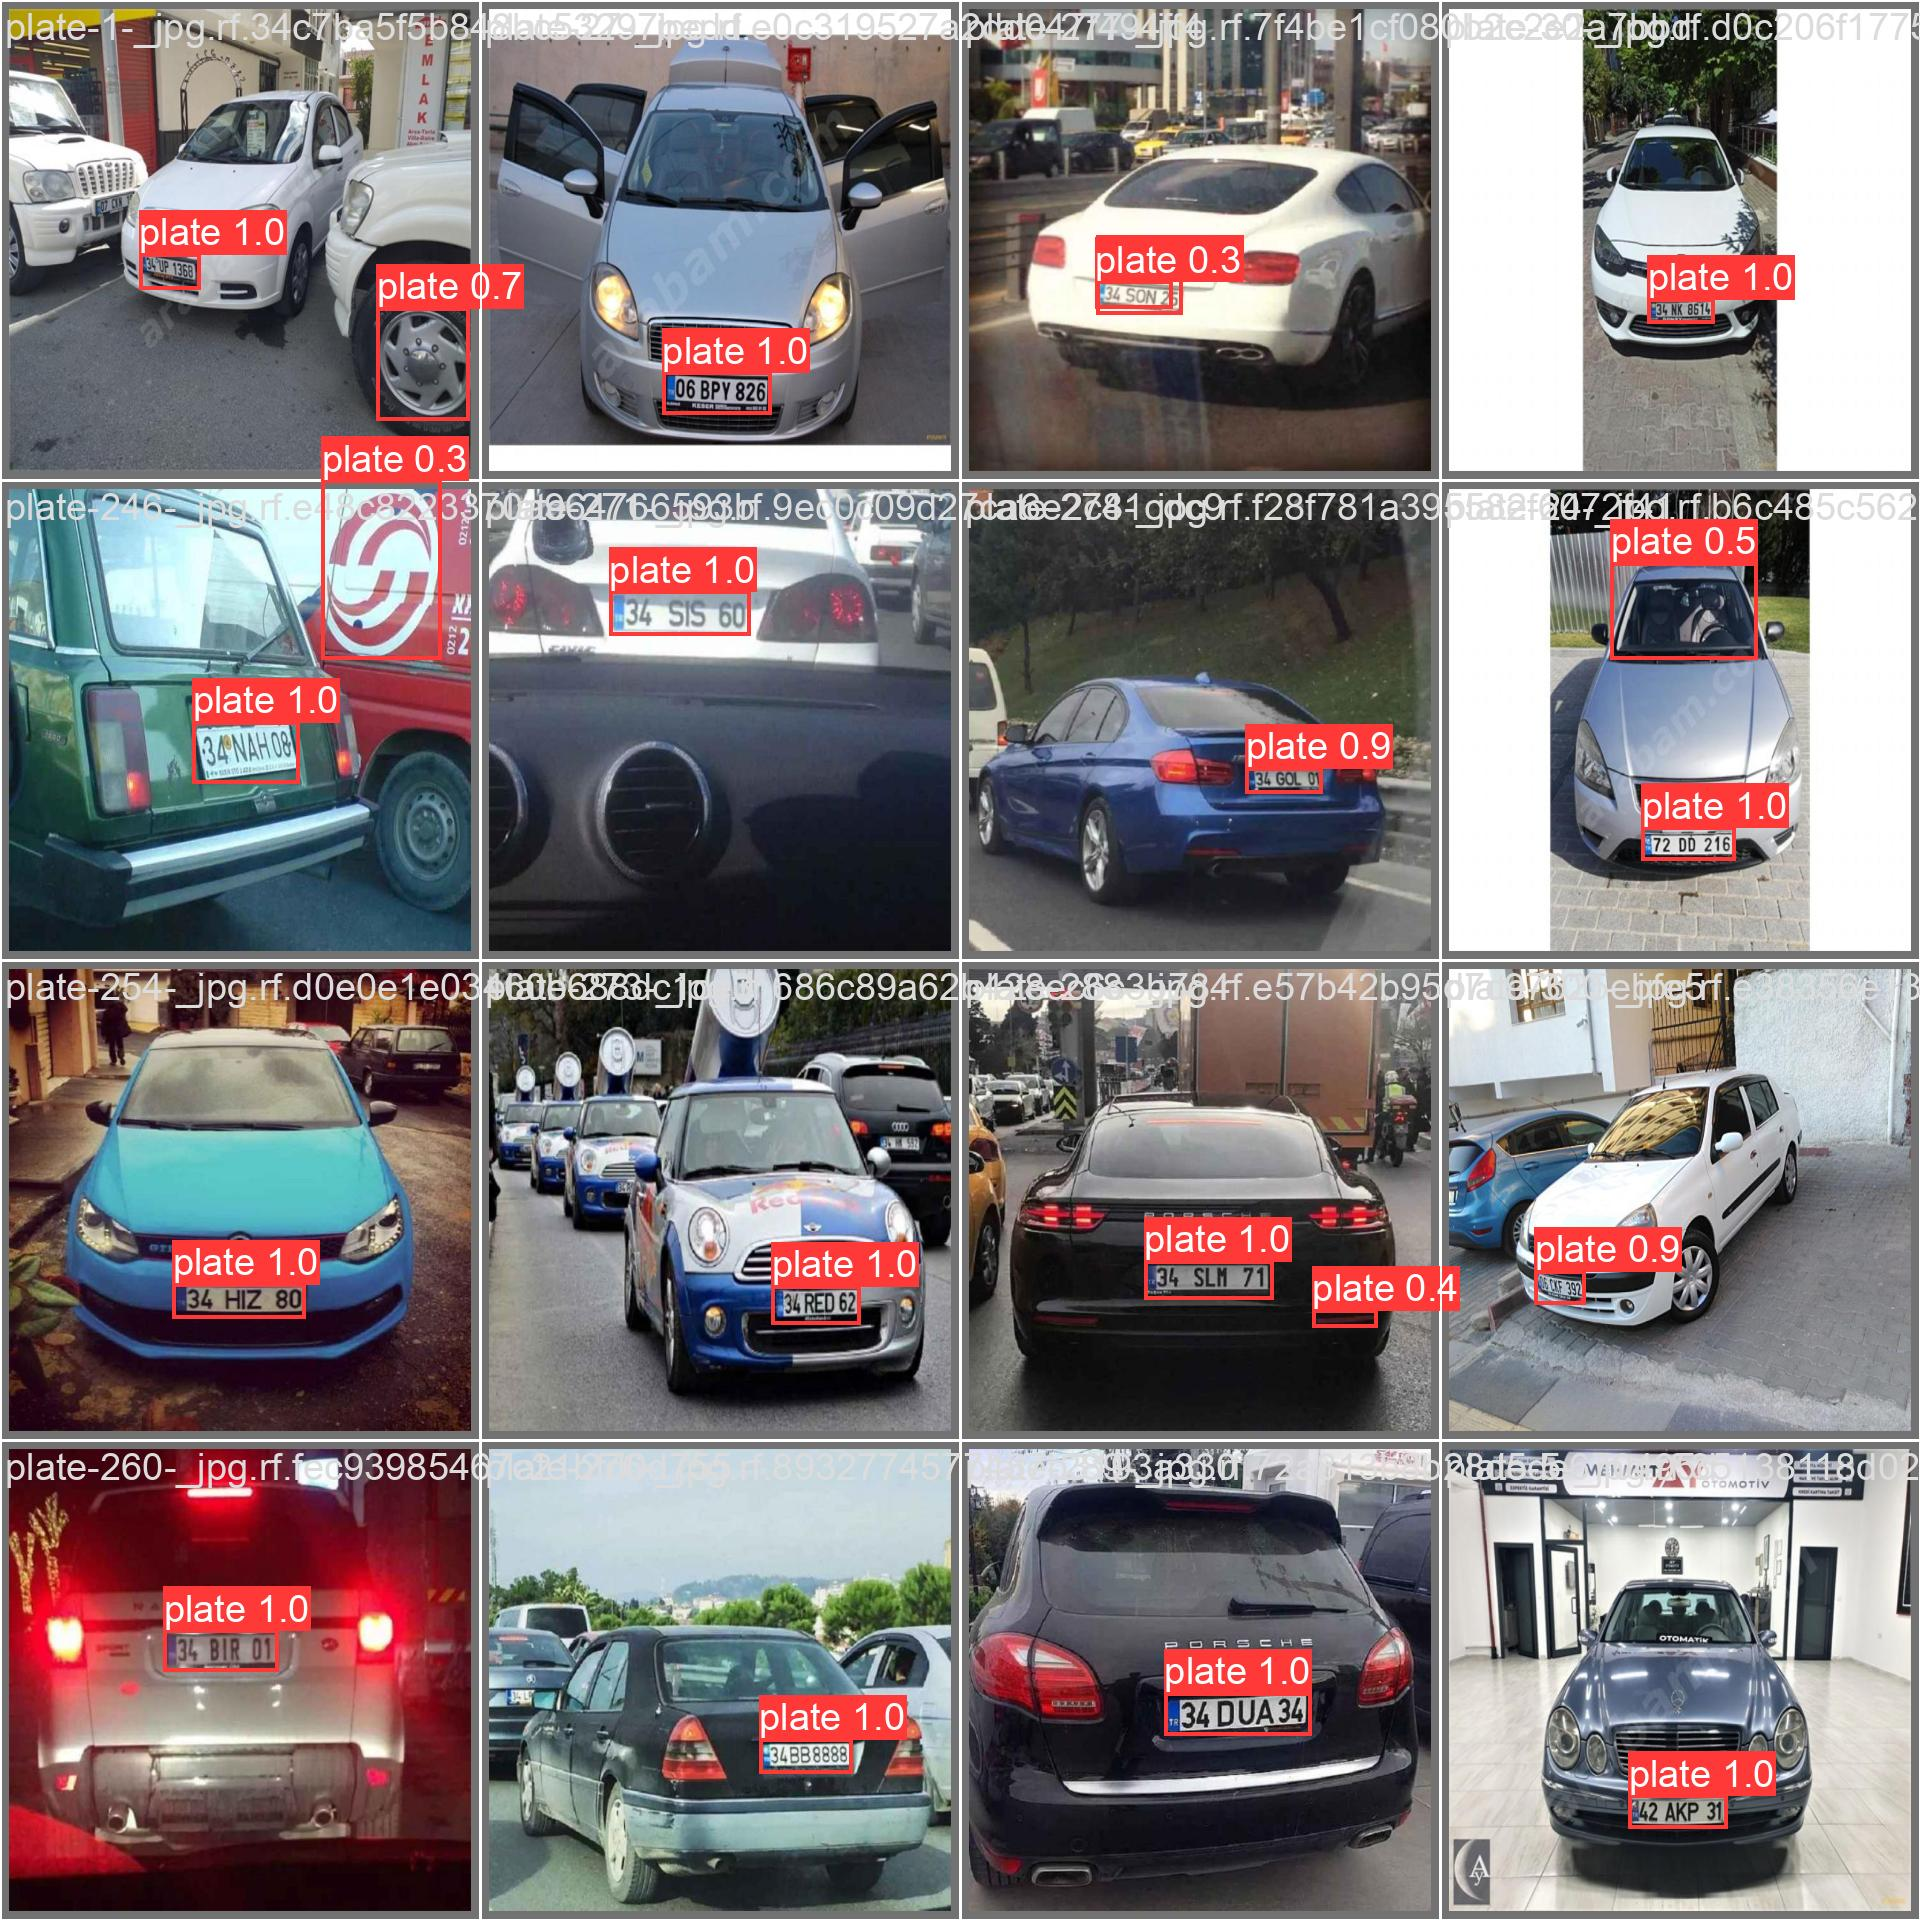

In [37]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [38]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/apprenant/Bureau/Immat
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (Quadro M2000M, 4042MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/apprenant/Bureau/Immat/plate-1/valid/labels.cache... 59 imag
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         59         63      0.886      0.905      0.933      0.682
Speed: 7.2ms preprocess, 64.4ms inference, 0.0ms loss, 13.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [39]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/apprenant/Bureau/Immat
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (Quadro M2000M, 4042MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/30 /home/apprenant/Bureau/Immat/plate-1/test/images/plate-10-_jpg.rf.96a1fa576d21244374938f5de228288a.jpg: 800x800 1 plate, 91.1ms
image 2/30 /home/apprenant/Bureau/Immat/plate-1/test/images/plate-117-_jpg.rf.83fafee9d2ee6dd457d9b5b4c533b5e3.jpg: 800x800 4 plates, 89.5ms
image 3/30 /home/apprenant/Bureau/Immat/plate-1/test/images/plate-130-_jpg.rf.8ca759f4f0a5ce5dee443c24243d43a5.jpg: 800x800 4 plates, 89.8ms
image 4/30 /home/apprenant/Bureau/Immat/plate-1/test/images/plate-146-_jpg.rf.7ae13a85fa64e366bba38af8018d7b7e.jpg: 800x800 3 plates, 89.4ms
image 5/30 /home/apprenant/Bureau/Immat/plate-1/test/images/plate-153-_jpg.rf.434f34d5b883f43807ae1b4880788130.jpg: 800x800 1 plate, 89.6ms
image 6/30 /home/apprenant/Bureau/Immat/plate-1/test/images/plate-154-_jpg.rf.8bafdba14b5b746ad

In [40]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")